Group Info
Nicolas Zhou 41741539
Scott Halston 

In [142]:
#Setup
import os       #for os.listdir to get all files in a directory
import cv2      #img analysis for machine learning - PIL has processing limitations
import numpy as np
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=4096)

#import sklearn's linear model predictors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


#assuming during grading we only path_testing will be changed:


path_train  ="./Lego_dataset_1-1/Lego_dataset_1/training"
#assuming training data path leads directly to folder labelled "training"

path_test   ="./Lego_dataset_1-1/Lego_dataset_1/testing"
#assuming testing data path leads directly to folder labelled "testing"

IMG_SIZE    =(64, 64) #normalize each image to 64 x 64
LABELS      ={"2b1":0,"cir":1,"rec":2,"squ":3} #we will call this dictionary when assigning training labels to our images


In [143]:
#Load Images to train
def load_images(path):
    img_data, img_label = [], []
    #assumptions:
    #image names will always start with "2b1", "squ", "cir", "rec" as shown above in #Setup
    #change these to y_p value of 0,1,2,3
    #use above function to grab each image's histogram

    #for each file in training path, non-indexed
    for file in os.listdir(path): 
        
        #full file path
        img_path = os.path.join(path,file)  

        #read image as grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        #resize image as 64x64; since cv2 already keeps its data in arrays, this results in 64x64 array
        img = cv2.resize(img, IMG_SIZE)
        img = img.flatten() #[1x4096 array]

        #flatten image data and append into img_data list as well as its label
        img_data.append(img)

        img_label.append(LABELS[file[:3]])
    
    return img_data, img_label

#this function's purpose is to obtain all images in a given file directory (path variable in setup)
#and return two lists as experienced in lecture; list_1 being x and list_2 being y values


In [144]:
#Training Classifier - Temporary Step

#setup a linear training model using sklearn's svc to help classify images as it uses multiple 1 vs 1 classifications
def train_model(path):
    x_train, y_train = load_images(path)

    model = LogisticRegression(fit_intercept=False, max_iter=4097)

    model.fit(x_train, y_train)

    return model

#this model will have ~4k ish weights if coefficients are printed


In [145]:
#Classify function

#using c_ to signify new variables
def classify_images(path)->tuple:
    
    #obtain image/function data of path using load_images
    c_x_test, c_y_test = load_images(path)

    #train model using above function + training folder path
    c_model = train_model(path_train) 
    
    #predict the y values of each new x_test value
    c_y_pred = c_model.predict(c_x_test)
    
    #return the confusion matrix as well as accuracy score of the test sample vs the training sample as a tuple
    return confusion_matrix(c_y_test,c_y_pred),accuracy_score(c_y_test,c_y_pred)
    

Accuracy Score: 100.0%
For data set located at ./Lego_dataset_1-1/Lego_dataset_1/training
Accuracy Score: 95.833333%
For data set located at ./Lego_dataset_1-1/Lego_dataset_1/testing


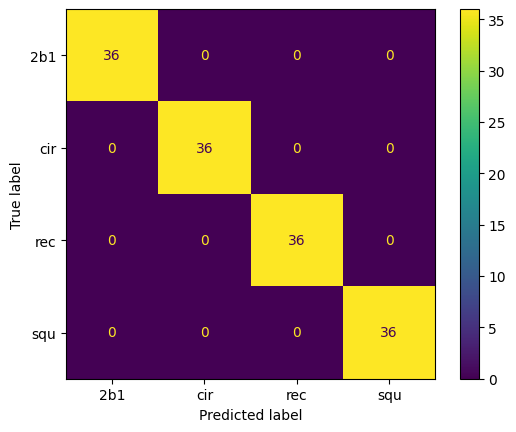

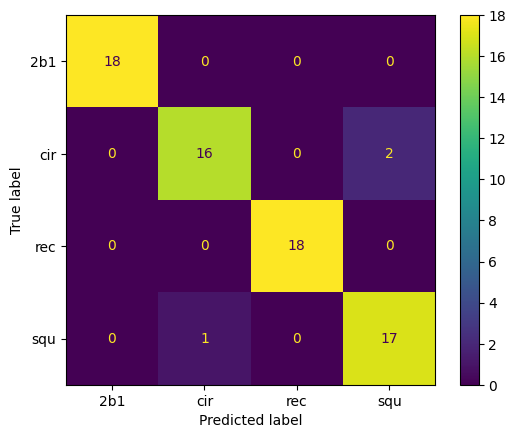

In [146]:
#Run Function
def test_function(path):
    #calls classify function to given path, returns confusion matrix and accuracy score
    c_matrix, accuracy = classify_images(path)


    disp = ConfusionMatrixDisplay(c_matrix,display_labels=LABELS.keys())
    disp.plot()
    

    print(f"Accuracy Score: {round(accuracy*100,6)}%\nFor data set located at {path}")

test_function(path_train)
test_function(path_test)

